In [3]:
import os
os.getcwd()
# os.chdir('/home/jecosine/Courses/Courses/COMP8800/Projects/CatBoostPlayground')
os.chdir('E:/Courses/COMP8800/Projects/CatBoostPlayground')
from allib.datasets import load_uci, AVAIL_DATASETS 

In [4]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import seaborn as sns


## Using random forest to compute feature importance

In [ ]:
ds = load_uci("adult")
rng = np.random.RandomState(seed=0)
ds._data["random_num"] = rng.randn(ds._data.shape[0])
ds.with_preprocess(["sample_n", "continuous_to_categorical", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {"encode": "ordinal"}, {}, {}], in_place=True)

rf = RandomForestClassifier(random_state=0, min_samples_leaf=10)

rf.fit(ds.u_x, ds.u_y)
res = permutation_importance(rf, ds.test_x, ds.test_y, n_repeats=20, random_state=0, n_jobs=10)
sorted_importance = res.importances_mean.argsort()
importances = pd.DataFrame(
    res.importances[sorted_importance].T,
    columns=ds.u_x.columns[sorted_importance],
)

## Using Catboost to compute feature importance

In [10]:
def load_dataset_with_default(dsn: str):
    ds = load_uci(dsn)
    rng = np.random.RandomState(seed=0)
    ds._data["random_num"] = rng.randn(ds._data.shape[0])
    ds.with_preprocess(["sample_n", "continuous_to_categorical", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {"encode": "ordinal"}, {}, {}], in_place=True)
    return ds

In [15]:
def plot_feature_importance(dsn: str):
    ds = load_dataset_with_default(dsn)
    rf = CatBoostClassifier(random_state=0, cat_features=ds.info["cat_idx"], verbose=0, iterations=100)
    rf.fit(ds.u_x, ds.u_y)
    # res = permutation_importance(rf, ds.test_x, ds.test_y, n_repeats=20, random_state=0, n_jobs=10)
    res = permutation_importance(rf, ds._data, ds._label, n_repeats=20, random_state=0, n_jobs=10)
    sorted_importance = res.importances_mean.argsort()
    importances = pd.DataFrame(
        res.importances[sorted_importance].T,
        columns=ds.u_x.columns[sorted_importance],
    )
    plot_name = f"feature_importance_{dsn}.png"
    sns.set(font_scale=1.5)
    ax = sns.boxplot(data=importances, orient="h", whis=10)
    ax.get_figure().patch.set_alpha(0)
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    print(f"RF train accuracy: {rf.score(ds.u_x, ds.u_y):.3f}")
    print(f"RF test accuracy: {rf.score(ds.test_x, ds.test_y):.3f}")
    ax.figure.tight_layout()
    ax.figure.savefig(f"examples/img/fi/{plot_name}")

/home/jecosine/anaconda3/envs/COMP8800/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


RF train accuracy: 0.766
RF test accuracy: 0.533


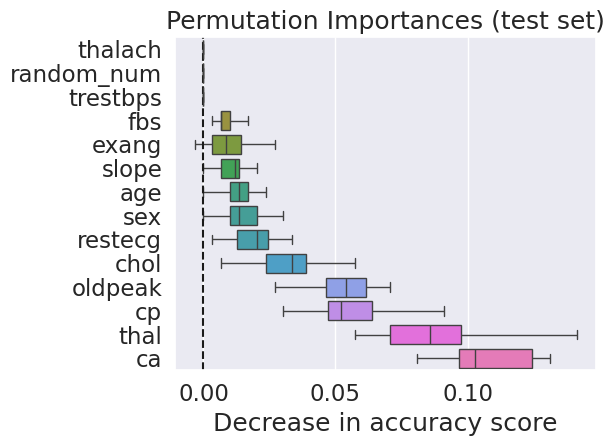

In [16]:
plot_feature_importance("heart-disease")

D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

RF train accuracy: 0.853
RF test accuracy: 0.835


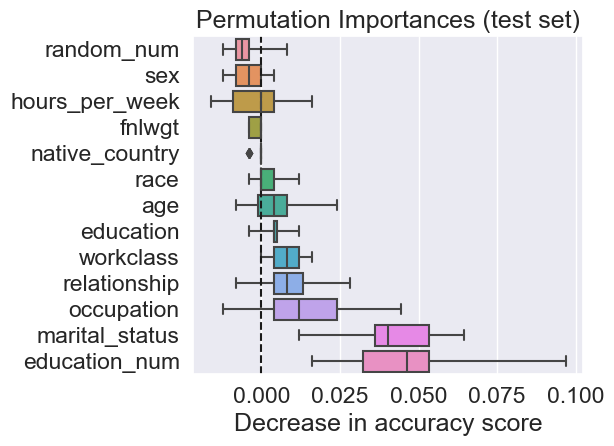

In [6]:
ds = load_uci("adult")
rng = np.random.RandomState(seed=0)
ds._data["random_num"] = rng.randn(ds._data.shape[0])
ds.with_preprocess(["sample_n", "continuous_to_categorical", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {"encode": "ordinal"}, {}, {}], in_place=True)

rf = CatBoostClassifier(random_state=0, cat_features=ds.info["cat_idx"], verbose=0, iterations=100)
rf.fit(ds.u_x, ds.u_y)
res = permutation_importance(rf, ds.test_x, ds.test_y, n_repeats=20, random_state=0, n_jobs=10)
sorted_importance = res.importances_mean.argsort()
importances = pd.DataFrame(
    res.importances[sorted_importance].T,
    columns=ds.u_x.columns[sorted_importance],
)

# set larger font size

# plt.rcParams.update({'font.size': 22})
# ax = importances.plot.box(vert=False, whis=10)
# set transparent background
sns.set(font_scale=1.5)
ax = sns.boxplot(data=importances, orient="h", whis=10)
ax.get_figure().patch.set_alpha(0)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
print(f"RF train accuracy: {rf.score(ds.u_x, ds.u_y):.3f}")
print(f"RF test accuracy: {rf.score(ds.test_x, ds.test_y):.3f}")
ax.figure.tight_layout()
ax.figure.savefig("img/fi/permutation_importance_cb_100.png")

D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

[0.22512022 0.17591388]


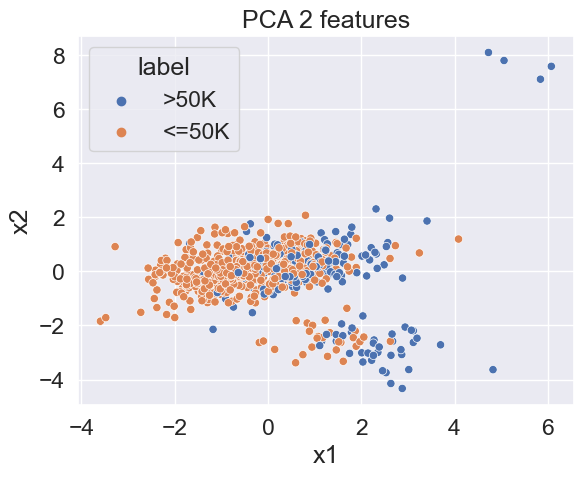

In [72]:
ds = load_uci("adult")
ds.with_preprocess(["sample_n", "continuous_only", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {}, {}, {}], in_place=True)
# visualize PCA 2 features
data, label = ds._data, ds._label
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
# normalize data
data = (data - data.mean()) / data.std()
pca_result = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_result, columns=["x1", "x2"])
pca_df["label"] = label
# set transparent background
plt.figure().patch.set_alpha(0)
sns.scatterplot(data=pca_df, x="x1", y="x2", hue="label")
plt.title("PCA 2 features")
plt.savefig("img/fi/adult@pca_2_features.png")
# print the explained variance ratio
print(pca.explained_variance_ratio_)

0.7348045706748962


D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

<Figure size 640x480 with 0 Axes>

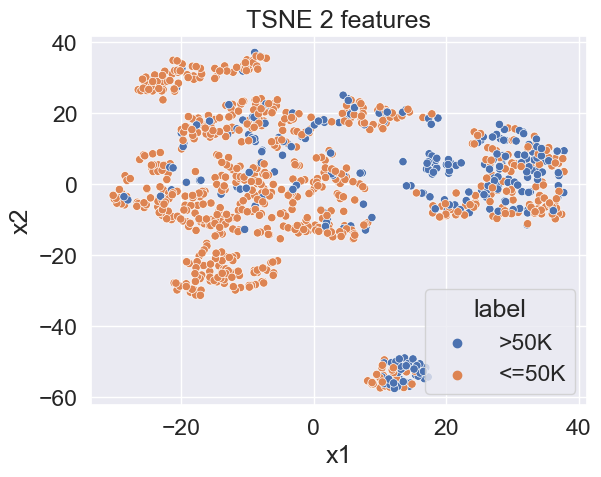

In [73]:
# tsne 3 features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data)
tsne_df = pd.DataFrame(tsne_result, columns=["x1", "x2"])
tsne_df["label"] = label
# scatter 3d
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# tsne_df["label"] = tsne_df["label"].astype("category").cat.codes
# ax.scatter(tsne_df["x1"], tsne_df["x2"], tsne_df["x3"], c=tsne_df["label"], cmap="viridis")
plt.figure().patch.set_alpha(0)
sns.scatterplot(data=tsne_df, x="x1", y="x2", hue="label")
plt.title("TSNE 2 features")
plt.savefig("img/fi/adult@tsne_2_features.png")
print(tsne.kl_divergence_)

7
16
7
15
6
5
2
30


In [37]:
import prince
import seaborn as sns
import matplotlib.pyplot as plt
DBN = "balance-scale"
ds = load_uci(DBN)
ds.with_preprocess(["sample_n", "categorical_only", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 10000, "random_state": 222}, {}, {}, {}], in_place=True)

data, label = ds._data, ds._label
print(data.columns)
mca = prince.MCA(n_components=6)
mca = mca.fit(data)
mca_df = mca.transform(data)


Index(['right_weight', 'left_distance', 'left_weight', 'right_distance'], dtype='object')


In [31]:
mca_df.columns = ["x1", "x2"]

In [38]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.250,6.25%,6.25%
1,0.250,6.25%,12.50%
2,0.250,6.25%,18.75%
3,0.250,6.25%,25.00%
4,0.250,6.25%,31.25%
5,0.250,6.25%,37.50%


D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\COMP8800\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

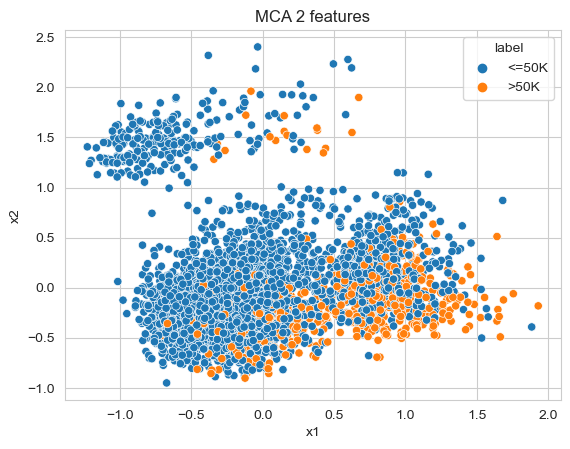

In [33]:
mca_df["label"] = label
plt.figure().patch.set_alpha(0)
sns.scatterplot(data=mca_df, x="x1", y="x2", hue="label")
plt.title("MCA 2 features")
plt.savefig(f"img/fi/{DBN}@mca_2_features.png")
# mca.plot(
#     data,
#     x_component=0,
#     y_component=1,
#     show_column_markers=True,
#     show_row_markers=True,
#     show_column_labels=False,
#     show_row_labels=False
# )

# Correlation

## Pearson correlation

In [56]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [60]:
ds = load_uci("adult")
rng = np.random.RandomState(seed=0)
ds._data["random_num"] = rng.randn(ds._data.shape[0])
# ds.with_preprocess(["sample_n", "continuous_to_categorical", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {"encode": "ordinal"}, {}, {}], in_place=True)
ds.with_preprocess(["sample_n", "continuous_only", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {}, {}, {}], in_place=True)

n_features = ds.u_x.shape[1]
pearsonr_cor = np.zeros((n_features, n_features))
spearmanr_cor = np.zeros((n_features, n_features))
ccor = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(i+1, n_features):
        x1, x2 = ds.u_x.iloc[:, i], ds.u_x.iloc[:, j]
        corr, _ = pearsonr(x1, x2)
        pearsonr_cor[i, j] = corr
        corr, _ = spearmanr(x1, x2)
        spearmanr_cor[i, j] = corr
        ccor[i, j] = ds.u_x.iloc[:, i].corr(ds.u_x.iloc[:, j])

In [ ]:
# visualize m_cor
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(title:str, cor):
    # set larger figure size
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.patch.set_alpha(0)
    # hide zero value
    mask = np.triu(np.ones_like(cor, dtype=bool))
    sns.heatmap(cor, mask=~mask, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    # increase the font size of ticks
    # plt.tick_params(axis='both', which='major', labelsize=30)
    # set feature names and align position with 0.5
    ax.set_xticks(np.arange(0, n_features, 1))
    ax.set_yticks(np.arange(0, n_features, 1))
    ax.set_ylim(n_features, 0)
    ax.set_xticklabels(ds.u_x.columns, rotation=70)
    ax.set_yticklabels(ds.u_x.columns, rotation=0)
    plt.savefig(title)
    
heatmap("img/fi/pearsonr_correlation.png", pearsonr_cor)
heatmap("img/fi/spearmanr_correlation.png", spearmanr_cor)
heatmap("img/fi/correlation.png", ccor)

# Dimension Reduction

In [25]:
import pickle

with open("/home/jecosine/Courses/Courses/COMP8800/Projects/CatBoostPlayground/app/comp_dist/ppl_cache_pred/adult@catboost@typiclust_goodall4_ordinal@100iter_catonly@x20.pkl", "rb") as f:
    pred = pickle.load(f)

In [ ]:
pred[0]["predictions"]

Text(0, 0.5, 'Density')

<Figure size 640x480 with 0 Axes>

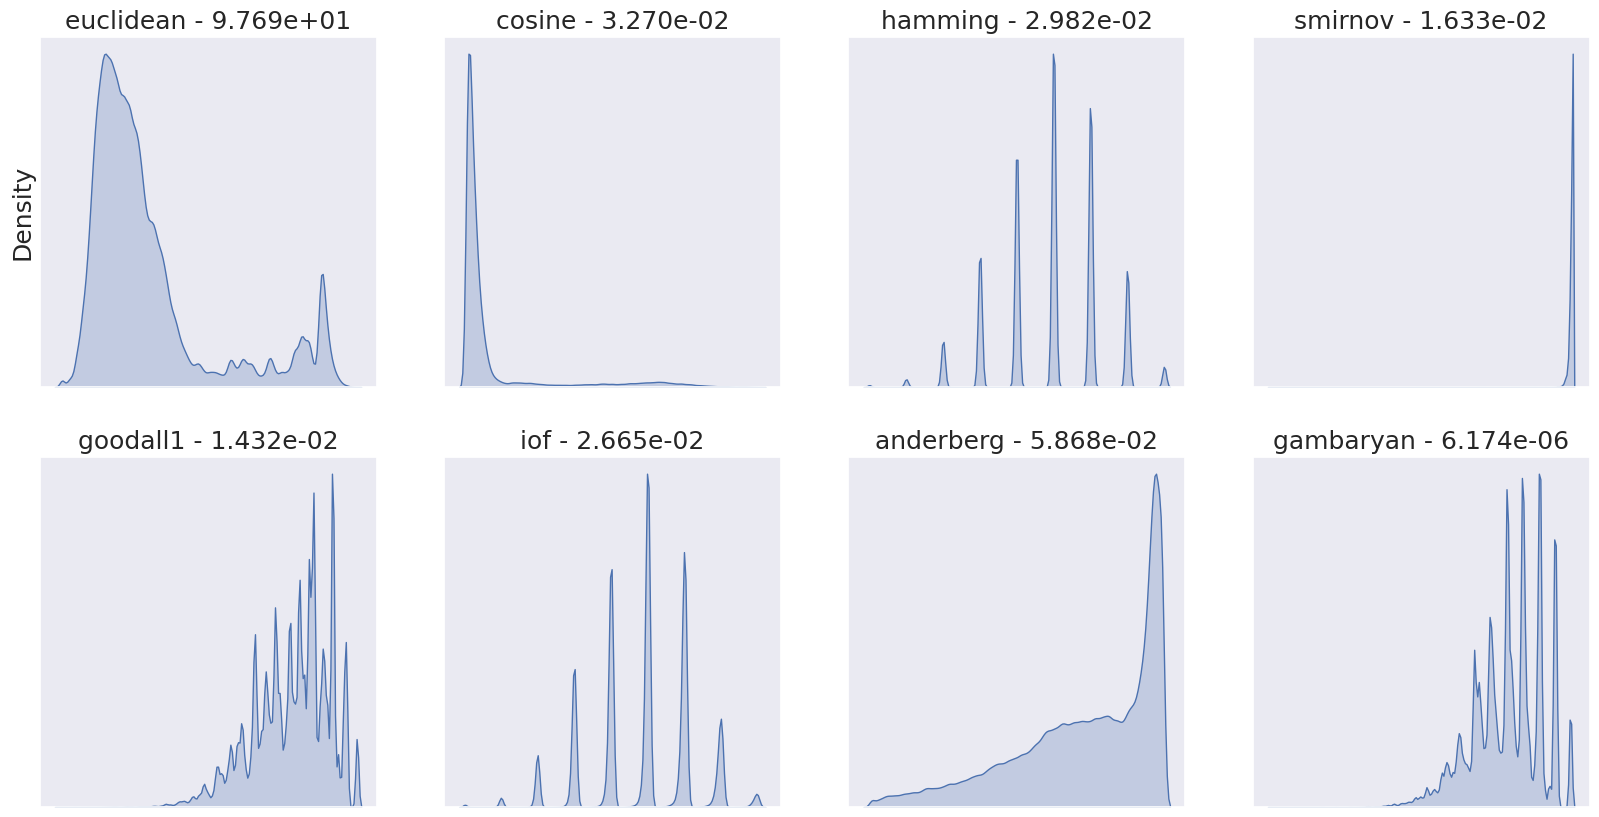

In [34]:
def load_distance(dsn: str, mn: str, suffix = "catonly"):
    fn = f"examples/dist_cache_1000/{dsn}/{mn}_{suffix}.npy"
    return np.load(fn)

d = load_distance("adult", "euclidean")
dn = ["euclidean", "cosine", "hamming", "smirnov", "goodall1", "iof", "anderberg", "gambaryan"]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure().patch.set_alpha(0)
# sns.histplot(d.flatten(), bins=100, kde=True)
# sns.kdeplot(d.flatten(), fill=True, bw_adjust=0.5)
# plt.title("Euclidean distance")
# 2 * 4 plot grid
sns.set(font_scale=1.5)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_alpha(0)
for i, ax in enumerate(axs.flatten()):
    d = load_distance("adult", dn[i], "catonly_wo_n")
    sns.kdeplot(d.flatten(), fill=True, bw_adjust=0.5, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{dn[i]} - {d.var():.3e}")
# add y label for the first column
axs[0, 0].set_ylabel("Density")


In [49]:
ds = load_uci("adult")
# ds.with_preprocess(["sample_n", "continuous_to_categorical", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {"encode": "ordinal"}, {}, {}], in_place=True)
ds.with_preprocess(["sample_n", "categorical_only", "remove_constant_columns", "drop_duplicate_rows"], params_list=[{"n": 1000, "random_state": 0}, {}, {}, {}], in_place=True)
labels = ds._label.label.astype("category").cat.codes
labels

0      1
1      0
2      1
3      1
4      0
      ..
988    0
990    1
991    0
993    0
995    1
Length: 654, dtype: int8

In [55]:
labels.reset_index(drop=True, inplace=True)
ll = pd.concat((labels[labels == 0], labels[labels == 1]))
idx = np.array(ll.index) - 1
# ds._label.iloc[ll.index]
idx

array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,  17,
        18,  19,  20,  21,  22,  24,  26,  27,  29,  30,  31,  32,  34,
        35,  36,  37,  38,  39,  42,  43,  44,  45,  46,  48,  49,  51,
        52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,
        67,  69,  71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        84,  87,  88,  89,  90,  93,  94,  95,  96,  97,  98,  99, 100,
       102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116,
       118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134,
       135, 137, 138, 139, 140, 141, 143, 145, 146, 147, 148, 150, 152,
       153, 154, 155, 156, 157, 158, 159, 161, 162, 164, 165, 167, 168,
       169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 185, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199,
       200, 201, 203, 204, 206, 208, 209, 210, 211, 212, 214, 215, 218,
       219, 220, 222, 224, 227, 228, 229, 230, 231, 232, 233, 23

<Figure size 640x480 with 0 Axes>

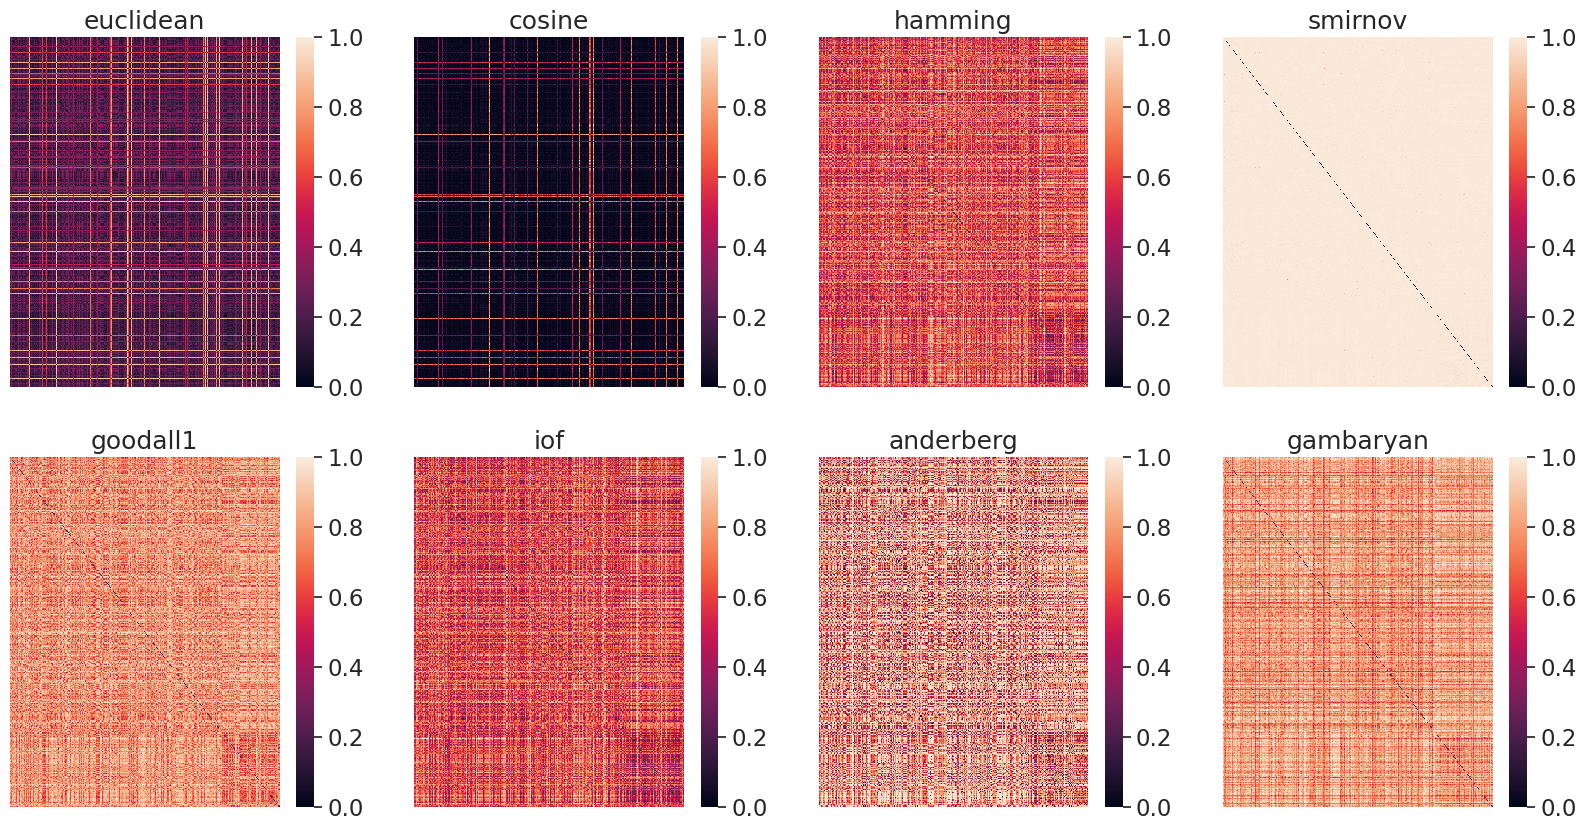

In [56]:
def load_distance(dsn: str, mn: str, suffix = "catonly"):
    fn = f"examples/dist_cache_1000/{dsn}/{mn}_{suffix}.npy"
    return np.load(fn)

d = load_distance("adult", "euclidean", "catonly_wo_n")
dn = ["euclidean", "cosine", "hamming", "smirnov", "goodall1", "iof", "anderberg", "gambaryan"]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure().patch.set_alpha(0)
# sns.histplot(d.flatten(), bins=100, kde=True)
# sns.kdeplot(d.flatten(), fill=True, bw_adjust=0.5)
# plt.title("Euclidean distance")
# 2 * 4 plot grid
sns.set(font_scale=1.5)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_alpha(0)
for i, ax in enumerate(axs.flatten()):
    d = load_distance("adult", dn[i], "catonly_wo_n")
    np.fill_diagonal(d, 0)
    # normalize to 0-1
    d = d / d.max()
    d = d[ll.index, :][:, ll.index]
    sns.heatmap(d, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{dn[i]}")
# add y label for the first column
# axs[0, 0].set_ylabel("Density")

In [5]:
from allib.datasets import AVAIL_DATASETS

In [9]:
for i in vc:
  print(i)

50
50
49


In [11]:
from scipy.stats import entropy
from collections import Counter
for dsn in AVAIL_DATASETS:
  ds = load_uci(dsn)
  # shannon diversity index
  vc = ds._label.value_counts()
  shannon = 0
  for v in vc:
    shannon += v / len(ds._label) * np.log(v / len(ds._label))
  shannon = -shannon
  shannon /= np.log(len(vc))
  print(f"{dsn}: {shannon:.3f}")

iris: 1.000
adult: 0.797
yeast: 0.753
letter-recognition: 0.999
image-segmentation: 1.000
balance-scale: 0.832
glass-identification: 0.842
wine: 0.989
heart-disease: 0.798
